In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf

In [3]:
import yfinance as yf # yfinance is used to download the data from yahoo finance

In [4]:
btc_data  = yf.download('BTC-USD' , period='3600d')
df = btc_data[['Open', 'High', 'Low', 'Close' , 'Adj Close', 'Volume']]  # İlgili sütunların seçilmesi

df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [5]:
df.info()  # Veri setinin bilgileri

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3405 entries, 2014-09-17 to 2024-01-12
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3405 non-null   float64
 1   High       3405 non-null   float64
 2   Low        3405 non-null   float64
 3   Close      3405 non-null   float64
 4   Adj Close  3405 non-null   float64
 5   Volume     3405 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 186.2 KB


In [6]:
len(df)  # Veri setinin uzunluğu

3405

In [7]:
# Only want closing price for each day 
bitcoin_prices = pd.DataFrame(df["Close"]).rename(columns={"Close": "Price"}) # Sadece kapanış fiyatlarını alıyoruz ve sütun ismini değiştiriyoruz
bitcoin_prices.head()

,Price
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014


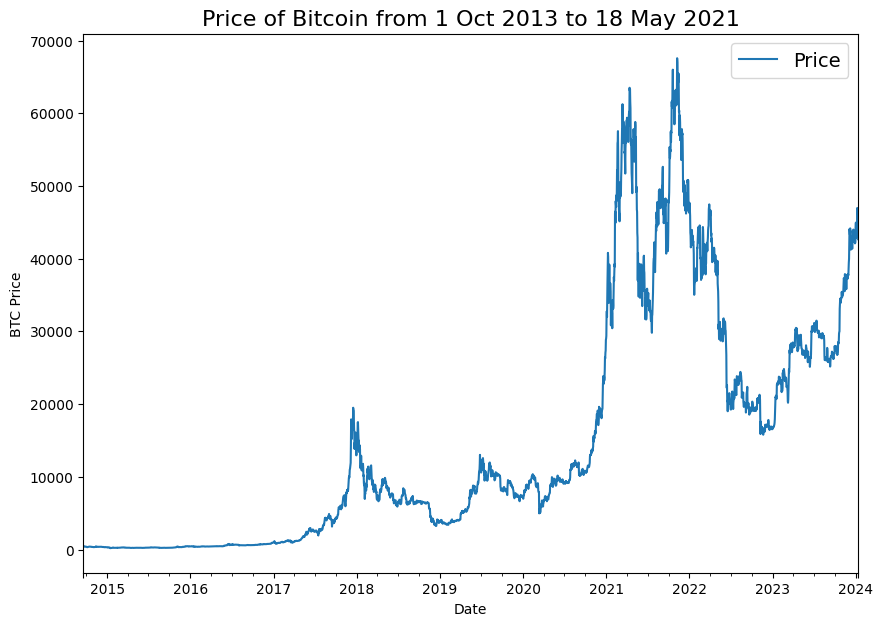

In [8]:
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.legend(fontsize=14);

In [9]:
# Formatting historical Bitcoin data with Python
from datetime import datetime

timesteps = []
btc_price = []


# ilk 10 satırın gösterilmesi
for row in df.itertuples():
  timesteps.append(row.Index)
  btc_price.append(row.Close)





timesteps[:10], btc_price[:10]

([Timestamp('2014-09-17 00:00:00'),
  Timestamp('2014-09-18 00:00:00'),
  Timestamp('2014-09-19 00:00:00'),
  Timestamp('2014-09-20 00:00:00'),
  Timestamp('2014-09-21 00:00:00'),
  Timestamp('2014-09-22 00:00:00'),
  Timestamp('2014-09-23 00:00:00'),
  Timestamp('2014-09-24 00:00:00'),
  Timestamp('2014-09-25 00:00:00'),
  Timestamp('2014-09-26 00:00:00')],
 [457.3340148925781,
  424.44000244140625,
  394.7959899902344,
  408.90399169921875,
  398.8210144042969,
  402.1520080566406,
  435.7909851074219,
  423.2049865722656,
  411.5740051269531,
  404.42498779296875])

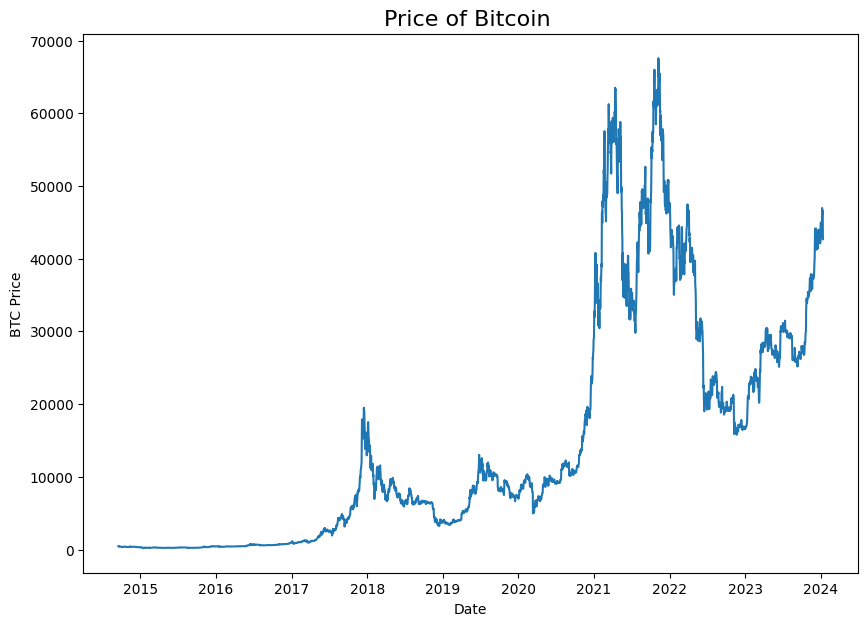

In [10]:
plt.figure(figsize=(10, 7))
plt.plot(timesteps, btc_price)
plt.title("Price of Bitcoin ", fontsize=16)
plt.xlabel("Date")
plt.ylabel("BTC Price");

In [11]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2014-09-17T00:00:00.000000000', '2014-09-18T00:00:00.000000000',
        '2014-09-19T00:00:00.000000000', '2014-09-20T00:00:00.000000000',
        '2014-09-21T00:00:00.000000000', '2014-09-22T00:00:00.000000000',
        '2014-09-23T00:00:00.000000000', '2014-09-24T00:00:00.000000000',
        '2014-09-25T00:00:00.000000000', '2014-09-26T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([457.33401489, 424.44000244, 394.79598999, 408.9039917 ,
        398.8210144 , 402.15200806, 435.79098511, 423.20498657,
        411.57400513, 404.42498779]))

In [12]:
# Create train and test splits the right way for time series data
split_size = int(0.8 * len(prices)) # 80% train, 20% test

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything after the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2724, 681, 2724, 681)

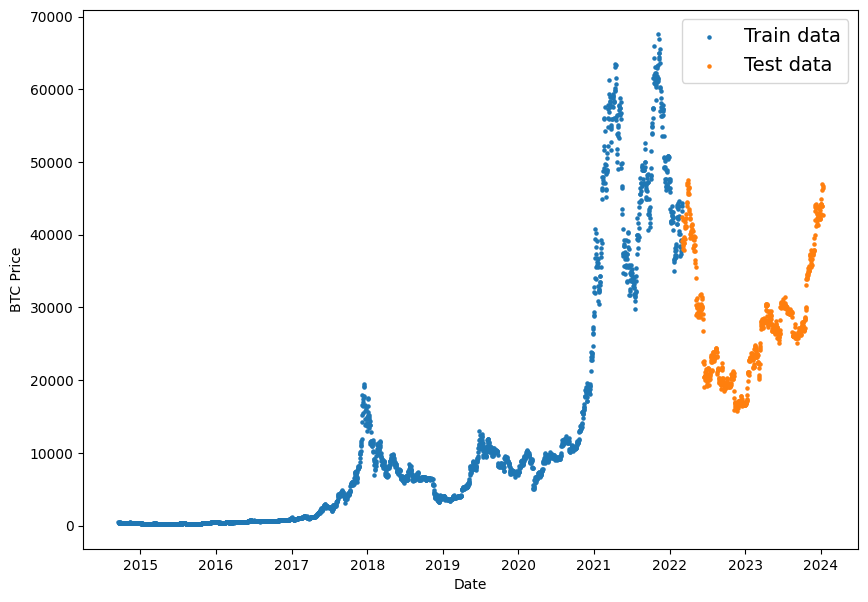

In [13]:
# Plot correctly made splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

In [14]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).
  
  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

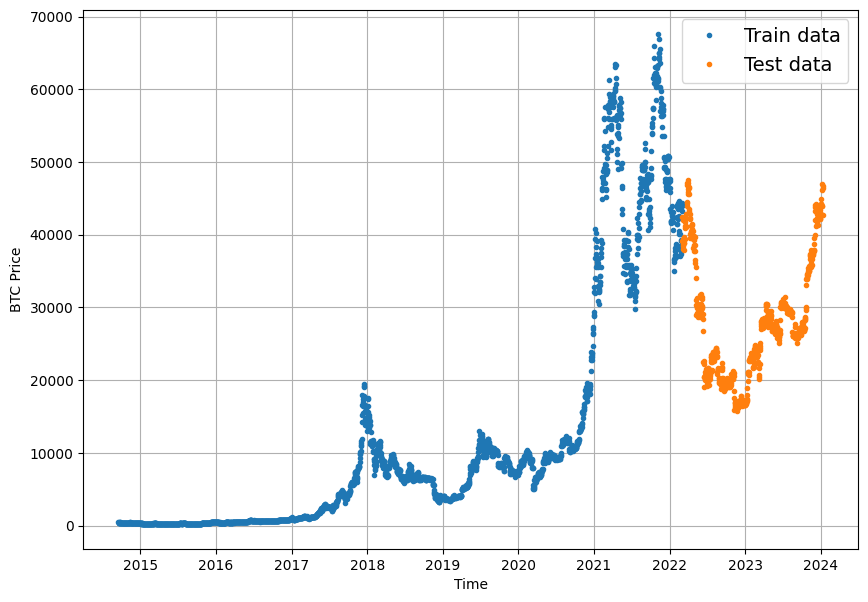

In [15]:
# Try out our plotting function
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

In [16]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  
  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy()
          }

In [17]:
# Find average price of Bitcoin in test dataset
tf.reduce_mean(y_test).numpy()

27692.664025215676

In [18]:
HORIZON = 1 # predict 1 step at a time
WINDOW_SIZE = 7 # use a week worth of timesteps to predict the horizon

In [19]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=1):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1 (default)
  Input: [1, 2, 3, 4, 5, 6] -> Output: ([1, 2, 3, 4, 5], [6])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [20]:
# Test out the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0), horizon=HORIZON)
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


In [21]:
# Create function to view NumPy arrays as windows 
def make_windows(x, window_size=7, horizon=1):
  """
  Turns a 1D array into a 2D array of sequential windows of window_size.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f"Window step:\n {window_step}")

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [22]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(3398, 3398)

In [23]:
#örnek 3 satırın düzenli şekilde gösterilmesi
for i in range(3):
  print(f"Window: {full_windows[i]} \n -> Label: {full_labels[i]}")


Window: [457.33401489 424.44000244 394.79598999 408.9039917  398.8210144
 402.15200806 435.79098511] 
 -> Label: [423.20498657]
Window: [424.44000244 394.79598999 408.9039917  398.8210144  402.15200806
 435.79098511 423.20498657] 
 -> Label: [411.57400513]
Window: [394.79598999 408.9039917  398.8210144  402.15200806 435.79098511
 423.20498657 411.57400513] 
 -> Label: [404.42498779]


In [24]:
# View the last 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i-3]}  \n -> Label: {full_labels[i-3]}")

Window: [42848.17578125 44179.921875   44162.69140625 43989.1953125
 43943.09765625 46970.50390625 46139.73046875]  
 -> Label: [46627.77734375]
Window: [44179.921875   44162.69140625 43989.1953125  43943.09765625
 46970.50390625 46139.73046875 46627.77734375]  
 -> Label: [46368.5859375]
Window: [44162.69140625 43989.1953125  43943.09765625 46970.50390625
 46139.73046875 46627.77734375 46368.5859375 ]  
 -> Label: [42673.484375]


Turning windows into training and test sets

In [25]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [26]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)
     

(2718, 680, 2718, 680)

In [27]:
train_windows[:5], train_labels[:5]

(array([[457.33401489, 424.44000244, 394.79598999, 408.9039917 ,
         398.8210144 , 402.15200806, 435.79098511],
        [424.44000244, 394.79598999, 408.9039917 , 398.8210144 ,
         402.15200806, 435.79098511, 423.20498657],
        [394.79598999, 408.9039917 , 398.8210144 , 402.15200806,
         435.79098511, 423.20498657, 411.57400513],
        [408.9039917 , 398.8210144 , 402.15200806, 435.79098511,
         423.20498657, 411.57400513, 404.42498779],
        [398.8210144 , 402.15200806, 435.79098511, 423.20498657,
         411.57400513, 404.42498779, 399.51998901]]),
 array([[423.20498657],
        [411.57400513],
        [404.42498779],
        [399.51998901],
        [377.18099976]]))

In [28]:
# Check to see if same (accounting for horizon and window size)
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])


False

In [29]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename 
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True) # save only the best model to file
 

## model 1

In [30]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# Construct model
model_1 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation                        
], name="model_1_dense") # give the model a name so we can save it

# Compile model
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"]) # we don't necessarily need this when the loss function is already MAE

# Fit model
model_1.fit(x=train_windows, # train windows of 7 timesteps of Bitcoin prices
            y=train_labels, # horizon value of 1 (using the previous 7 timesteps to predict next day)
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            )

Epoch 1/100
22/22 [==============================] - 1s 10ms/step - loss: 5009.4570 - mae: 5009.4570 - val_loss: 5294.0391 - val_mae: 5294.0391
Epoch 2/100
22/22 [==============================] - 0s 2ms/step - loss: 1181.6061 - mae: 1181.6061 - val_loss: 1186.0154 - val_mae: 1186.0154
Epoch 3/100
22/22 [==============================] - 0s 2ms/step - loss: 728.0838 - mae: 728.0838 - val_loss: 1016.5864 - val_mae: 1016.5864
Epoch 4/100
22/22 [==============================] - 0s 2ms/step - loss: 640.9014 - mae: 640.9014 - val_loss: 949.0798 - val_mae: 949.0798
Epoch 5/100
22/22 [==============================] - 0s 3ms/step - loss: 620.2151 - mae: 620.2151 - val_loss: 1024.9723 - val_mae: 1024.9723
Epoch 6/100
22/22 [==============================] - 0s 3ms/step - loss: 617.4420 - mae: 617.4420 - val_loss: 967.1521 - val_mae: 967.1521
Epoch 7/100
22/22 [==============================] - 0s 2ms/step - loss: 598.0033 - mae: 598.0033 - val_loss: 888.3342 - val_mae: 888.3342
Epoch 8/100
22

In [31]:

# Evaluate model on test data
model_1.evaluate(test_windows, test_labels)

22/22 [==============================] - 0s 882us/step - loss: 531.3417 - mae: 531.3417


[531.3416748046875, 531.3416748046875]

In [32]:
# Load in saved best performing model_1 and evaluate on test data
model_1.evaluate(test_windows, test_labels)
     

22/22 [==============================] - 0s 1ms/step - loss: 531.3417 - mae: 531.3417


[531.3416748046875, 531.3416748046875]

In [33]:

def make_preds(model, input_data):
  """
  Uses model to make predictions on input_data.

  Parameters
  ----------
  model: trained model 
  input_data: windowed input data (same kind of data model was trained on)

  Returns model predictions on input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

In [34]:

# Make predictions using model_1 on the test dataset and view the results
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

22/22 [==============================] - 0s 716us/step


(680,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([43219.703, 39913.4  , 39406.164, 38585.332, 38156.77 , 38642.484,
        41607.984, 40011.83 , 39130.164, 39068.676], dtype=float32)>)

In [35]:

# Evaluate preds
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels), # reduce to right shape
                                 y_pred=model_1_preds)
model_1_results

{'mae': 531.34155, 'mse': 665598.3, 'rmse': 815.8421, 'mape': 1.9225898}

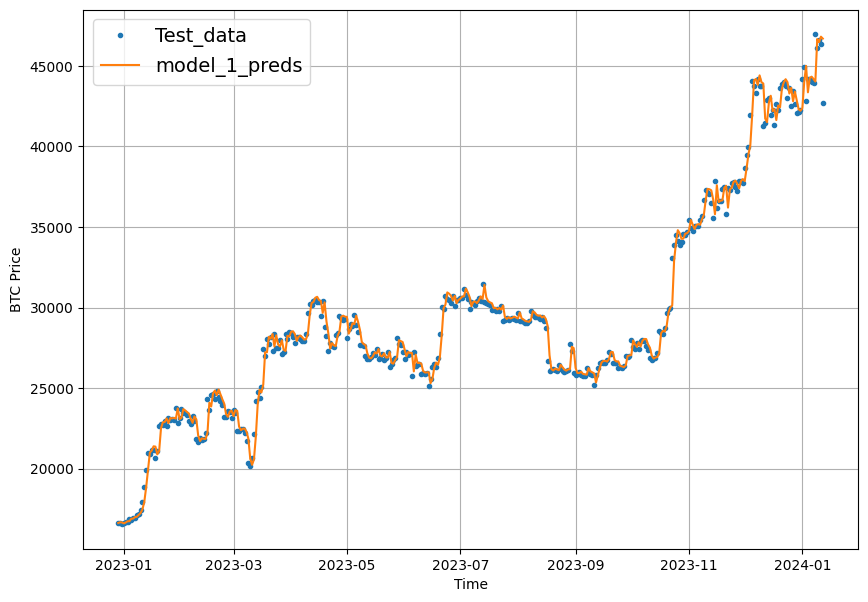

In [36]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, start=offset, format="-", label="model_1_preds")
     

## Model 3 DENSE (win = 30 horizon = 7)

In [37]:
HORIZON = 7
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)


(3369, 3369)

In [38]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels, test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)
     


(2695, 674, 2695, 674)

In [39]:
tf.random.set_seed(42)

# Create model (same as model_1 except with different data input size)
model_3 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_3_dense")

model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
)


In [40]:

# How did our model with a larger window size and horizon go?
model_3.evaluate(test_windows, test_labels)

22/22 [==============================] - 0s 2ms/step - loss: 1104.4095


1104.4095458984375

In [41]:

# Load in best version of model_3 and evaluate
model_3.evaluate(test_windows, test_labels)

22/22 [==============================] - 0s 2ms/step - loss: 1104.4095


1104.4095458984375

In [42]:


# The predictions are going to be 7 steps at a time (this is the HORIZON size)
model_3_preds = make_preds(model_3,
                           input_data=test_windows)
model_3_preds[:5]

22/22 [==============================] - 0s 787us/step


<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[43431.41 , 43985.4  , 43944.402, 43590.965, 43391.242, 43837.477,
        44990.496],
       [40384.863, 41218.504, 40731.64 , 41134.24 , 40663.414, 40951.496,
        41991.457],
       [39046.42 , 39123.043, 40041.09 , 39380.137, 39253.66 , 39558.883,
        41150.582],
       [37566.79 , 38764.49 , 37803.863, 38555.387, 39220.684, 39095.742,
        39263.848],
       [37327.605, 38411.035, 36554.53 , 38199.395, 38664.047, 37966.336,
        38427.832]], dtype=float32)>

In [43]:
# Calculate model_3 results - these are going to be multi-dimensional because
# we're trying to predict more than one step at a time.
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': array([4570.503  , 2125.6284 , 1255.476  , 1087.89   , 1436.5173 ,
        1476.2595 , 1300.0977 ,  844.673  , 1471.278  , 1850.2695 ,
        3130.8967 , 3506.345  , 2942.0134 , 1848.1222 , 1576.3438 ,
         963.5703 , 1309.4358 , 1457.5295 , 2729.2104 , 3199.1736 ,
        3563.2634 , 2277.7356 , 2375.1128 , 2082.5378 ,  490.9771 ,
         745.92523, 1601.5558 , 1549.8683 , 1568.408  , 1807.8906 ,
        2207.609  , 2801.7617 , 4285.2837 , 4328.386  , 2814.4124 ,
        2711.6902 , 1889.8783 , 2118.4922 , 1664.5441 ,  481.69196,
         672.1719 ,  465.30078,  794.0229 , 1050.0245 ,  964.3086 ,
        1136.7684 , 1016.0614 , 1258.6741 , 1682.1072 , 1012.44586,
        1032.2361 ,  742.06305, 1105.5731 , 1375.4766 ,  771.202  ,
         638.85266, 1247.3303 ,  887.3365 , 1336.3175 , 2117.9197 ,
        2502.4158 , 3413.4497 , 5276.4595 , 5095.8984 , 5078.7104 ,
        4881.8296 , 4140.757  , 1580.4846 , 1144.6322 , 1023.67773,
        1529.899  , 1271.043  ,  695.7095

In [44]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, reduce to single number)
  if mae.ndim > 0: # if mae isn't already a scalar, reduce it to one by aggregating tensors to mean
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),}

In [45]:
# Get model_3 results aggregated to single values
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results


{'mae': 1104.4095, 'mse': 2780498.5, 'rmse': 1276.6917, 'mape': 4.084549}

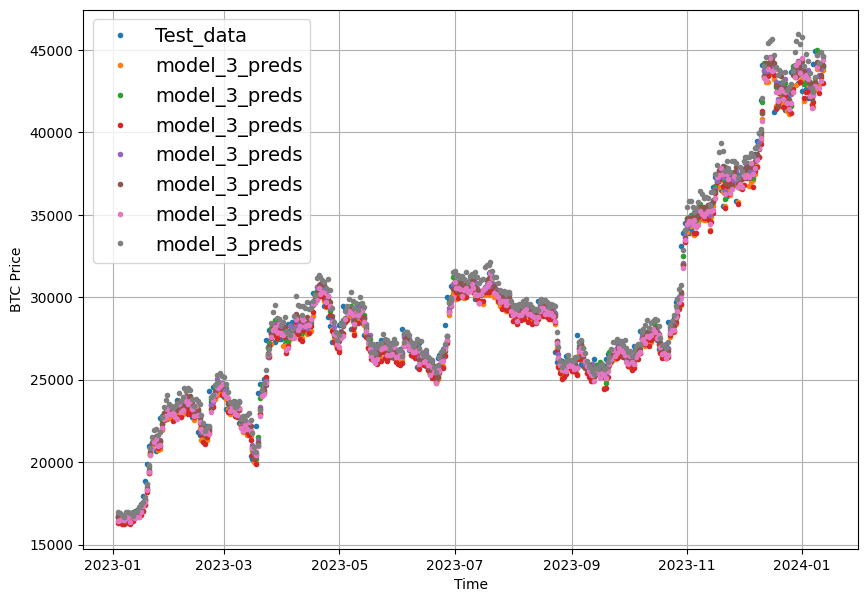

In [46]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
# Checking the shape of model_3_preds results in [n_test_samples, HORIZON] (this will screw up the plot)
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds, start=offset, label="model_3_preds")
     


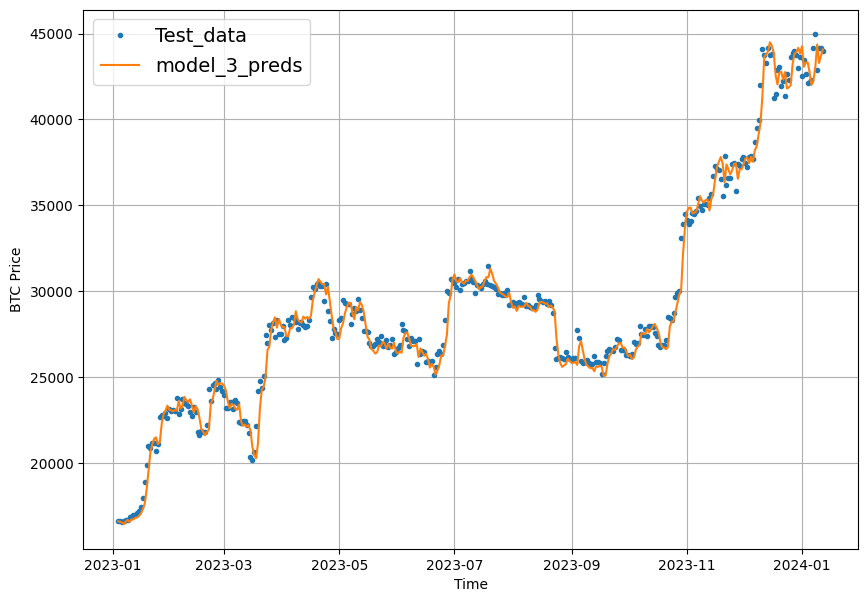

In [47]:
offset = 300
plt.figure(figsize=(10, 7))
# Plot model_3_preds by aggregating them (note: this condenses information so the preds will look fruther ahead than the test data)
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=test_labels[:, 0], 
                 start=offset, 
                 label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=tf.reduce_mean(model_3_preds, axis=1), 
                 format="-",
                 start=offset, 
                 label="model_3_preds")


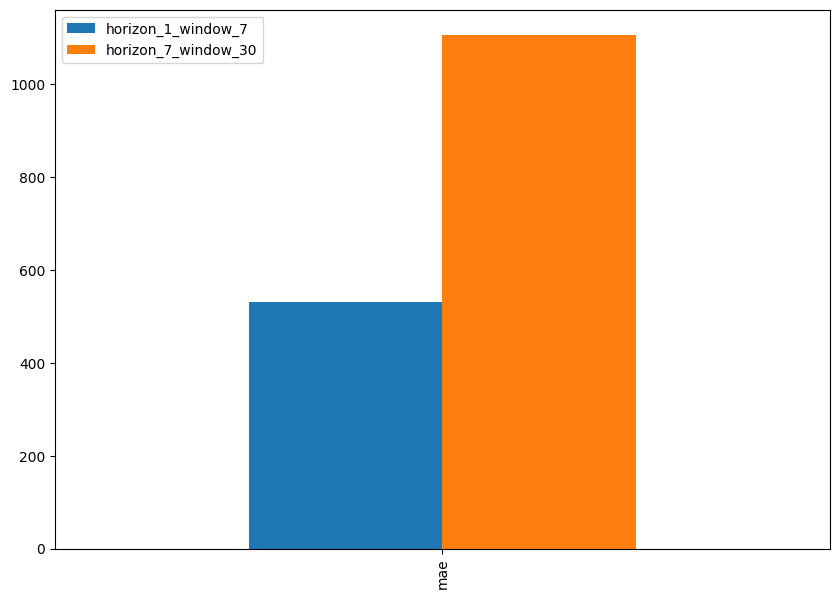

In [48]:
pd.DataFrame({
              "horizon_1_window_7": model_1_results["mae"], 
               
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar");


## Model 5  RNN (LSTM )

In [49]:
tf.random.set_seed(42)

# Let's build an LSTM model with the Functional API
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs) # expand input dimension to be compatible with LSTM
# print(x.shape)
# x = layers.LSTM(128, activation="relu", return_sequences=True)(x) # this layer will error if the inputs are not the right shape
x = layers.LSTM(128, activation="relu")(x) # using the tanh loss function results in a massive error
# print(x.shape)
# Add another optional dense layer (you could add more of these to see if they improve model performance)
# x = layers.Dense(32, activation="relu")(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=output, name="model_5_lstm")

# Compile model
model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Seems when saving the model several warnings are appearing: https://github.com/tensorflow/tensorflow/issues/47554 
model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=0,
            batch_size=128,
            validation_data=(test_windows, test_labels))
       
     


In [50]:

# Load in best version of model 5 and evaluate on the test data
model_5.evaluate(test_windows, test_labels)

22/22 [==============================] - 0s 2ms/step - loss: 1110.2235


1110.2235107421875

In [51]:

# Make predictions with our LSTM model
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:10]

22/22 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(10, 7), dtype=float32, numpy=
array([[43309.152, 43260.59 , 43762.008, 42976.996, 43081.43 , 44208.74 ,
        44017.754],
       [41257.91 , 41467.535, 41989.582, 41127.33 , 40703.03 , 42232.016,
        41679.402],
       [40132.34 , 40823.906, 40318.625, 40085.426, 40258.766, 41142.008,
        40413.29 ],
       [38992.89 , 39228.395, 39379.273, 39141.04 , 38788.82 , 40196.438,
        39781.63 ],
       [38235.824, 38058.28 , 38270.547, 38698.797, 38081.65 , 39422.875,
        38878.727],
       [38076.26 , 37812.61 , 38151.91 , 38788.77 , 38104.695, 39308.86 ,
        38654.484],
       [39669.875, 39429.684, 39781.426, 40344.297, 39388.484, 40603.355,
        39911.46 ],
       [39706.285, 38812.734, 39034.85 , 40010.47 , 39248.062, 40355.824,
        39883.85 ],
       [39134.77 , 38594.12 , 38372.516, 39238.723, 39172.508, 39691.76 ,
        39174.13 ],
       [38725.816, 38438.156, 38471.594, 38912.137, 38926.406, 38941.094,
        38688.523]], dtype=floa

In [52]:
# Evaluate model 5 preds
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results


{'mae': 1110.2235, 'mse': 2853583.2, 'rmse': 1271.1227, 'mape': 4.1073475}

# Multivariate time series 

In [53]:

# Let's make a multivariate time series
bitcoin_prices.head()

,Price
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014


In [54]:
# Block reward values
block_reward_1 = 50 # 3 January 2009 (2009-01-03) - this block reward isn't in our dataset (it starts from 01 October 2013)
block_reward_2 = 25 # 28 November 2012 
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 11 May 2020

# Block reward dates (datetime form of the above date stamps)
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-11")



# Get date indexes for when to add in different block dates
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
#block_reward_2_days, block_reward_3_days


# Add block_reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

# Set values of block_reward column (it's the last column hence -1 indexing on iloc)
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2014-09-17,457.334015,25
2014-09-18,424.440002,25
2014-09-19,394.795990,25
2014-09-20,408.903992,25
2014-09-21,398.821014,25


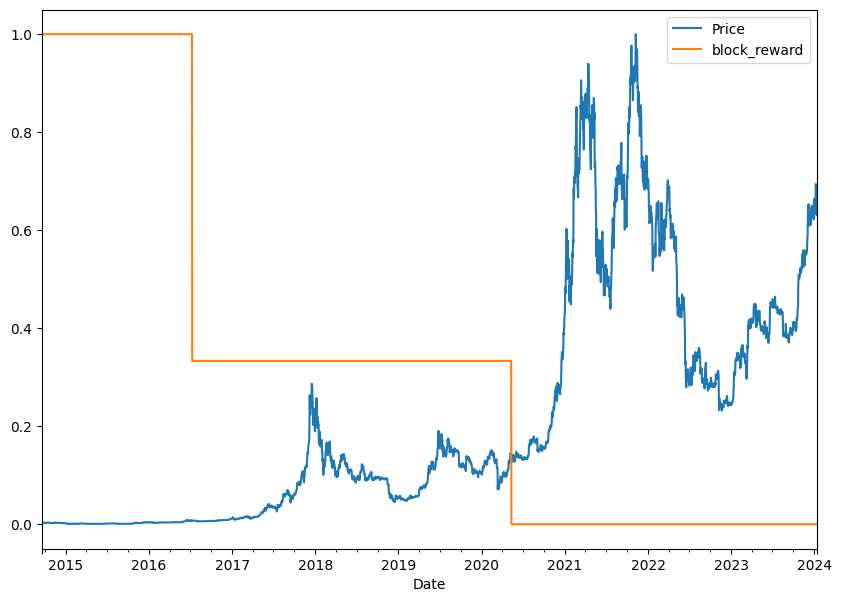

In [55]:

# Plot the block reward/price over time
# Note: Because of the different scales of our values we'll scale them to be between 0 and 1.
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]), # we need to scale the data first
                                     columns=bitcoin_prices_block.columns,
                                     index=bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize=(10, 7));

In [56]:

# Setup dataset hyperparameters
HORIZON = 1
WINDOW_SIZE = 7

In [57]:
# Make a copy of the Bitcoin historical data with block reward feature
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Add windowed columns
for i in range(WINDOW_SIZE): # Shift values for each step in WINDOW_SIZE
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2014-09-17,457.334015,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-18,424.440002,25,457.334015,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-19,394.795990,25,424.440002,457.334015,NaN,NaN,NaN,NaN,NaN
2014-09-20,408.903992,25,394.795990,424.440002,457.334015,NaN,NaN,NaN,NaN
2014-09-21,398.821014,25,408.903992,394.795990,424.440002,457.334015,NaN,NaN,NaN
2014-09-22,402.152008,25,398.821014,408.903992,394.795990,424.440002,457.334015,NaN,NaN
2014-09-23,435.790985,25,402.152008,398.821014,408.903992,394.795990,424.440002,457.334015,NaN
2014-09-24,423.204987,25,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002,457.334015
2014-09-25,411.574005,25,423.204987,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002


In [58]:


# Let's create X & y, remove the NaN's and convert to float32 to prevent TensorFlow errors 
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32) 
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2014-09-24,25.0,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002,457.334015
2014-09-25,25.0,423.204987,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002
2014-09-26,25.0,411.574005,423.204987,435.790985,402.152008,398.821014,408.903992,394.795990
2014-09-27,25.0,404.424988,411.574005,423.204987,435.790985,402.152008,398.821014,408.903992
2014-09-28,25.0,399.519989,404.424988,411.574005,423.204987,435.790985,402.152008,398.821014


In [59]:
# View labels
y.head()


Date
2014-09-24    423.204987
2014-09-25    411.574005
2014-09-26    404.424988
2014-09-27    399.519989
2014-09-28    377.181000
Name: Price, dtype: float32

In [60]:

# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2718, 2718, 680, 680)

## model 6 Multivariate time series (DENSE)

In [61]:
tf.random.set_seed(42)

# Make multivariate time series model
model_6 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  # layers.Dense(128, activation="relu"), # adding an extra layer here should lead to beating the naive model
  layers.Dense(HORIZON)
], name="model_6_dense_multivariate")

# Compile
model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_6.fit(X_train, y_train,
            epochs=100,
            batch_size=128,
            verbose=0, # only print 1 line per epoch
            validation_data=(X_test, y_test))  

In [62]:
# Make sure best model is loaded and evaluate
model_6.evaluate(X_test, y_test)

22/22 [==============================] - 0s 1ms/step - loss: 583.0364


583.0364379882812

In [63]:

# Make predictions on multivariate data
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]


22/22 [==============================] - 0s 811us/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([43135.26 , 39912.816, 39834.668, 38826.87 , 38314.31 , 38960.223,
       42009.19 , 40041.71 , 39214.793, 39346.027], dtype=float32)>

In [64]:
# Evaluate preds
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_preds)
model_6_results

{'mae': 583.03656, 'mse': 726723.3, 'rmse': 852.48065, 'mape': 2.1201234}

## Model 9: Train a model on the full historical data to make predictions into future

In [65]:
bitcoin_prices_windowed.head()


,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2014-09-17,457.334015,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-18,424.440002,25,457.334015,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-19,394.795990,25,424.440002,457.334015,NaN,NaN,NaN,NaN,NaN
2014-09-20,408.903992,25,394.795990,424.440002,457.334015,NaN,NaN,NaN,NaN
2014-09-21,398.821014,25,408.903992,394.795990,424.440002,457.334015,NaN,NaN,NaN


In [66]:
# Train model on entire data to make prediction for the next day 
X_all = bitcoin_prices_windowed.drop(["Price", "block_reward"], axis=1).dropna().to_numpy() # only want prices, our future model can be a univariate model
y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy()

In [67]:

# 1. Turn X and y into tensor Datasets
features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# 2. Combine features & labels
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [68]:
tf.random.set_seed(42)

# Create model (nice and simple, just to test)
model_9 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
])

# Compile
model_9.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())

# Fit model on all of the data to make future forecasts
model_9.fit(dataset_all,
            epochs=100,
            verbose=0) # don't print out anything, we've seen this all before
     

In [69]:
# How many timesteps to predict into the future?
INTO_FUTURE = 14 # since our Bitcoin data is daily, this is for 14 days


In [70]:
# 1. Create function to make predictions into the future
def make_future_forecast(values, model, into_future, window_size=WINDOW_SIZE) -> list:
  """
  Makes future forecasts into_future steps after values ends.

  Returns future forecasts as list of floats.
  """
  # 2. Make an empty list for future forecasts/prepare data to forecast on
  future_forecast = []
  last_window = values[-WINDOW_SIZE:] # only want preds from the last window (this will get updated)

  # 3. Make INTO_FUTURE number of predictions, altering the data which gets predicted on each time 
  for _ in range(into_future):
    
    # Predict on last window then append it again, again, again (model starts to make forecasts on its own forecasts)
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on: \n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")
    
    # Append predictions to future_forecast
    future_forecast.append(tf.squeeze(future_pred).numpy())
    # print(future_forecast)

    # Update last window with new pred and get WINDOW_SIZE most recent preds (model was trained on WINDOW_SIZE windows)
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]
  
  return future_forecast

In [71]:

# Make forecasts into future of the price of Bitcoin
# Note: if you're reading this at a later date, you may already be in the future, so the forecasts 
# we're making may not actually be forecasts, if that's the case, readjust the training data.
future_forecast = make_future_forecast(values=y_all,
                                       model=model_9,
                                       into_future=INTO_FUTURE,
                                       window_size=WINDOW_SIZE)

1/1 [==============================] - 0s 46ms/step
Predicting on: 
 [43989.1953125  43943.09765625 46970.50390625 46139.73046875
 46627.77734375 46368.5859375  42673.484375  ] -> Prediction: 44688.359375

1/1 [==============================] - 0s 28ms/step
Predicting on: 
 [43943.09765625 46970.50390625 46139.73046875 46627.77734375
 46368.5859375  42673.484375   44688.359375  ] -> Prediction: 46159.85546875

1/1 [==============================] - 0s 19ms/step
Predicting on: 
 [46970.50390625 46139.73046875 46627.77734375 46368.5859375
 42673.484375   44688.359375   46159.85546875] -> Prediction: 46042.1484375

1/1 [==============================] - 0s 16ms/step
Predicting on: 
 [46139.73046875 46627.77734375 46368.5859375  42673.484375
 44688.359375   46159.85546875 46042.1484375 ] -> Prediction: 45832.7421875

1/1 [==============================] - 0s 15ms/step
Predicting on: 
 [46627.77734375 46368.5859375  42673.484375   44688.359375
 46159.85546875 46042.1484375  45832.7421875 ] 

In [72]:
future_forecast[:10]


[44688.36,
 46159.855,
 46042.15,
 45832.742,
 45081.55,
 44232.54,
 44385.56,
 45565.793,
 45717.63,
 45208.297]

In [73]:
def get_future_dates(start_date, into_future, offset=1):
  """
  Returns array of datetime values from ranging from start_date to start_date+horizon.

  start_date: date to start range (np.datetime64)
  into_future: number of days to add onto start date for range (int)
  offset: number of days to offset start_date by (default 1)
  """
  start_date = start_date + np.timedelta64(offset, "D") # specify start date, "D" stands for day
  end_date = start_date + np.timedelta64(into_future, "D") # specify end date
  return np.arange(start_date, end_date, dtype="datetime64[D]") # return a date range between start date and end date
     


In [74]:

# Last timestep of timesteps (currently in np.datetime64 format)
last_timestep = bitcoin_prices.index[-1]
last_timestep


Timestamp('2024-01-12 00:00:00')

In [75]:

# Get next two weeks of timesteps
next_time_steps = get_future_dates(start_date=last_timestep, 
                                   into_future=INTO_FUTURE)
next_time_steps

array(['2024-01-13', '2024-01-14', '2024-01-15', '2024-01-16',
       '2024-01-17', '2024-01-18', '2024-01-19', '2024-01-20',
       '2024-01-21', '2024-01-22', '2024-01-23', '2024-01-24',
       '2024-01-25', '2024-01-26'], dtype='datetime64[D]')

In [76]:

# Insert last timestep/final price so the graph doesn't look messed
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, btc_price[-1])
next_time_steps, future_forecast

(array(['2024-01-12', '2024-01-13', '2024-01-14', '2024-01-15',
        '2024-01-16', '2024-01-17', '2024-01-18', '2024-01-19',
        '2024-01-20', '2024-01-21', '2024-01-22', '2024-01-23',
        '2024-01-24', '2024-01-25', '2024-01-26'], dtype='datetime64[D]'),
 array([42673.484, 44688.36 , 46159.855, 46042.15 , 45832.742, 45081.55 ,
        44232.54 , 44385.56 , 45565.793, 45717.63 , 45208.297, 44761.223,
        44379.63 , 44523.45 , 45045.594], dtype=float32))

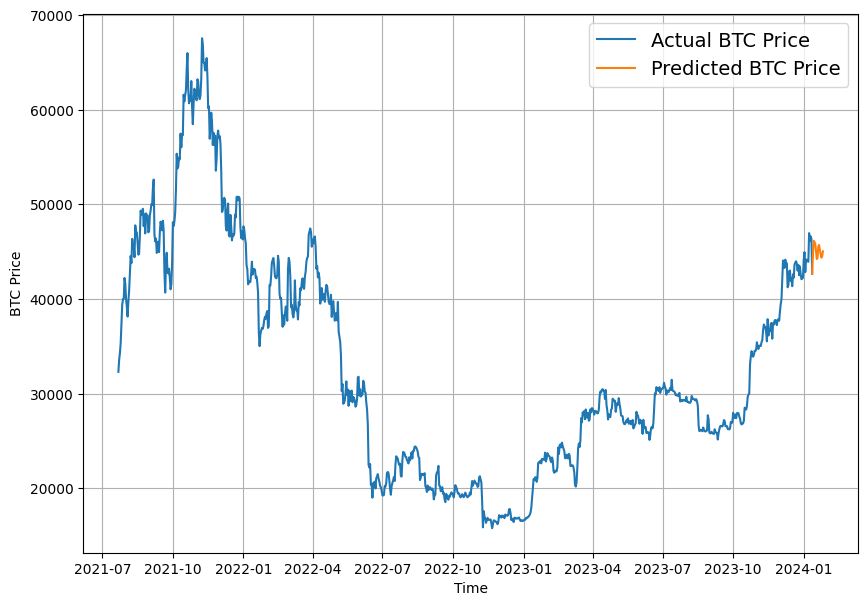

In [77]:
# Plot future price predictions of Bitcoin
plt.figure(figsize=(10, 7))
plot_time_series(bitcoin_prices.index, btc_price, start=2500, format="-", label="Actual BTC Price")
plot_time_series(next_time_steps, future_forecast, format="-", label="Predicted BTC Price")


In [78]:
#future forecastın tarihlerini ve fiyatları bana yaz
future_forecast = pd.DataFrame(future_forecast, columns=["Price"])
future_forecast["Date"] = next_time_steps
future_forecast.set_index("Date", inplace=True)
future_forecast


,Price
Date,
2024-01-12,42673.484375
2024-01-13,44688.359375
2024-01-14,46159.855469
2024-01-15,46042.148438
2024-01-16,45832.742188
2024-01-17,45081.550781
2024-01-18,44232.539062
2024-01-19,44385.558594
2024-01-20,45565.792969
